In [5]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

df = pd.read_excel("fr_countvectorizer.xlsx")

y = df["label"]

def parse_dict(x):
    d = {}
    for pair in str(x).split(","):
        if ":" in pair:
            k, v = pair.split(":")
            d[k.strip()] = float(v.strip())
    return d

count_dicts = df["countvectorizer"].apply(parse_dict)

vec = DictVectorizer(sparse=True)
X = vec.fit_transform(count_dicts)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

param_grid = {
    "C": [0.01, 0.1, 1, 5, 10],
    "loss": ["hinge", "squared_hinge"],
    "tol": [1e-4, 1e-3, 1e-2],
    "max_iter": [20000, 30000, 50000]
}

grid = GridSearchCV(
    LinearSVC(),
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("\n=== BEST PARAMETERS ===")
print(grid.best_params_)

print("\n=== BEST CV SCORE (F1 weighted) ===")
print(grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\n=== EVALUATION REPORT (BEST MODEL) ===")
print(classification_report(y_test, y_pred))



=== BEST PARAMETERS ===
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 20000, 'tol': 0.0001}

=== BEST CV SCORE (F1 weighted) ===
0.8753656988628353

=== EVALUATION REPORT (BEST MODEL) ===
              precision    recall  f1-score   support

          CG       0.87      0.88      0.88      4044
          OR       0.88      0.87      0.87      4043

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



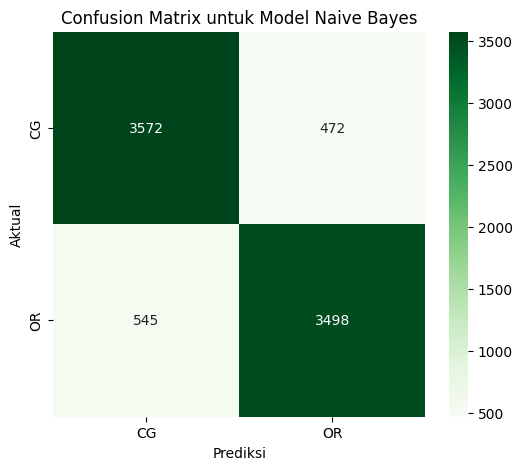

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = ["CG", "OR"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix untuk Model Naive Bayes")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()